# Classes de complexité des algorithmes

Mesurer la performance d'un algorithme est un problème complexe. Plusieurs éléments peuvent être pris en compte, le plus souvent le temps qu'il prendra à s'exécuter et l'espace mémoire qu'il occupera. Ce temps ou cet espace mémoire dépendront de la taille de l'entrée fournie à l'algorithme. Il est évident que calculer le maximum d'un ensemble constitué d'un élément sera plus rapide que de calculer le maximum d'un ensemble d'un millier d'éléments. Le temps ou l'espace mémoire consommés sont donc **une fonction de la taille de l'entrée**. Mesurer la performance d'algorithmes revient donc à chercher à comparer des fonctions entre elles.

Il convient aussi de rester réaliste : estimer théoriquement le temps ou l'espace mémoire occupé par un algorithme est aujourd'hui un travail périlleux étant donné la complexité des systèmes sur lesquels les algorithmes seront évalués. Ainsi lorsqu'il faut concevoir un algorithme performant, même si l'étude théorique est nécessaire à la compréhension du problème et pour le choix des structures et algorithmes adaptées, elle ne remplacera pas un test de performance en conditions réelles, avec les données sur lesquelles l'algorithme sera réellement amené à calculer et sur la machine sur laquelle il sera exécuté. Il ne sert à rien d'utiliser une structure de données optimale d'un point de vue théorique lorsque les données sont immenses, si vous savez qu'en pratique, elle seront toujours de petite taille. De même les effets de cache dans l'exploitation de la mémoire pourront changer drastiquement les performances d'un programme selon son implémentation, alors que d'un point de vue théorique les variations seraient imperceptibles.

Une fois l'algorithme conçu et implémenté, il est donc nécessaire de réaliser un vrai test de performances avant de pousser plus loin l'optimisation du code. Des outils d'analyse de performance et de profilage permettent de déterminer quels sont les éléments du code les plus utilisés. Ils **doivent** être utilisés pour ne pas perdre son temps à optimiser inutilement des fonctions marginales. Toute tentative d'optimisation sans ces outils relève de **l'optimisation immature** et sera probablement une perte de temps.

## Complexité asymptotique

Nous l'avons dit, comparer des algorithme revient à comparer des fonctions : la fonction qui étant donné la taille de l'entrée indique le nombre d'itérations de l'algorithme, ou l'espace mémoire qu'il consomme. La **complexité asymptotique** est une technique pour comparer ces fonctions. Cette technique s'intéresse à leur comportement lorsque les données deviennent très grandes, et tendent vers une taille infinie.

## Outils de test

Cette partie met en place quelques outils pour tracer des courbes, et évaluer les performances de programmes.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import time
import numpy as np
import math
import random

In [2]:
def plot_array(array, log = False):
    if log:
        plt.semilogy(array)
    else:
        plt.plot(array)
    plt.show()

def plot_fun(f, input):
    vals = np.array([f(i) for i in input])
    plot_array(vals)
    return vals

def perf(f, input, trials=10):
    res = []
    for i in input:
        t = time.time()
        for j in range(trials):
            f(i)
        res.append((time.time() - t)/trials)
    return np.array(res)
    

## Comparer deux fonctions

En complexité asymptotique, l'outil utilisé pour comparer deux fonction consiste à faire le ratio entre les deux fonctions (diviser l'une par l'autre). Examinons d'abord un premier algorithme pour calculer le maximum d'un tableau.

In [3]:
def maximum(tab):
    m = tab[0]
    for e in tab:
        if e > m:
            m = e
    return m

In [4]:
t = [random.randint(0, 100) for i in range(20)]
print(t)
print(maximum(t))

[46, 65, 72, 66, 32, 83, 78, 91, 93, 23, 50, 85, 73, 14, 60, 12, 84, 27, 28, 64]
93


In [5]:
max_input = [[random.randint(0, size) for i in range(size)] for size in range(1, 2000)]

In [6]:
max_perfs = perf(maximum, max_input)

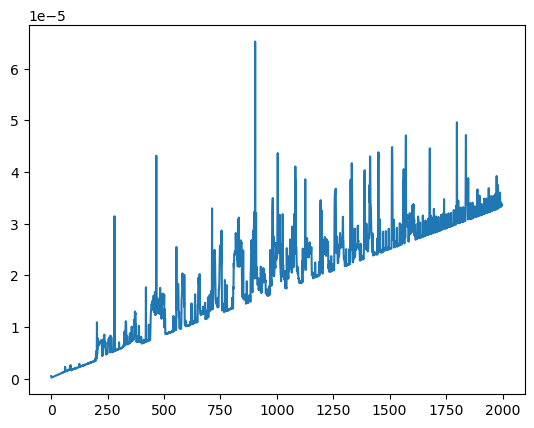

In [7]:
plot_array(max_perfs)

Nous avons tracé ici le temps mis par l'algorithme en fonction de la taille du tableau fourni en entrée. La fonction ressemble à une droite. Examinons maintenant un second algorithme pour calculer le maximum d'un tableau, cette fois en réalisant un tournoi.

In [8]:
def tournoi(tab):
    return tournoi_aux(tab, 0, len(tab))

def tournoi_aux(tab, debut, fin):
    if (fin - debut) == 1:
        return tab[debut]
    milieu = (debut + fin) // 2
    m1 = tournoi_aux(tab, debut, milieu)
    m2 = tournoi_aux(tab, milieu, fin)
    if m1 < m2:
        return m2
    return m1
    

In [9]:
print(t)
print(tournoi(t))

[46, 65, 72, 66, 32, 83, 78, 91, 93, 23, 50, 85, 73, 14, 60, 12, 84, 27, 28, 64]
93


In [10]:
tournoi_perfs = perf(tournoi, max_input)

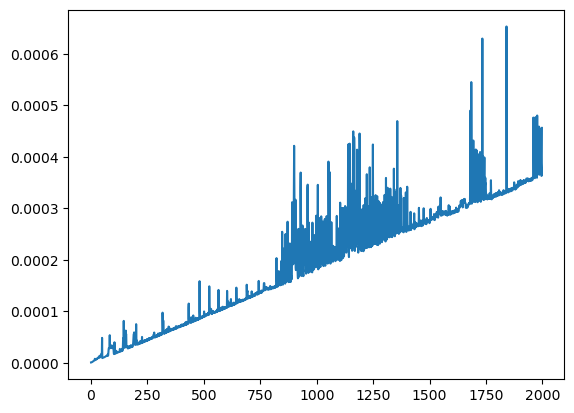

In [11]:
plot_array(tournoi_perfs)

Nous avons ici le temps de calcul de la version par tournoi en fonction de la taille du tableau. Lorsque nous comparons des nombres, nous utilisons l'opération $\leq$. Pour les fonctions en complexité asymptotique, l'équivalent de cette comparaison consiste à regarder le comportement de la fonction qui consiste à diviser l'une par l'autre :

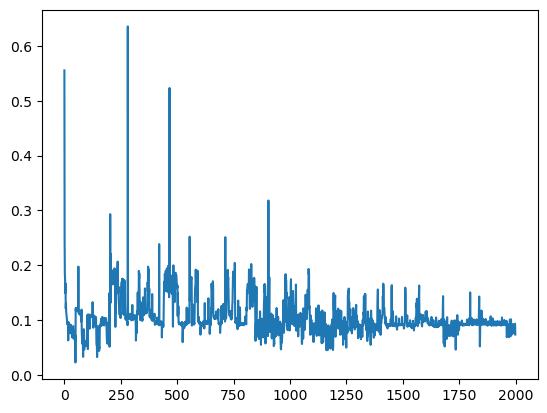

In [12]:
plot_array(max_perfs / tournoi_perfs)

Informellement sur le graphe précédent, on dira qu'une fonction $f$ est plus petite qu'une fonction $g$ si le ratio $\frac{f}{g}$ reste sous une ligne horizontale (une constante). Comme vous pouvez le voir sur le graphe précédent, le début de la courbe peut être assez buité. Étant donné que nous sommes en complexité asymptotique, et que seules le comportant quand la taille des données tend vers l'infini nous intéresse, il est possible d'ignorer le début. Sur l'exemple précédent, nous pouvonx dire qu'à partir de données de taille 750, le ration $\frac{f}{g}$ est plus petit que $1$.

Formellement, cette comparaison se note $O$. Dire que $f$ est "plus petite" que $g$ sera noté $f = O(g)$. Et cette relation est définie ainsi :

$$
    f = O(g) 
    \mbox{ s'il existe un nombre } n_0 \geq 0 
    \mbox{ et une constante } c > 0 
    \mbox{ tels que pour tout } n \geq n_0,
    f(n) \leq c \times g(n).
$$

ou plus succintement

$$
    f = O(g) \Leftrightarrow
    \exists n_0 \geq 0,
    \exists c > 0,
    \forall n \geq n_0,
    f(n) \leq c \times g(n)
$$

Dans l'exemple précédent, $n_0$ correspond à la taille 750 à partir de laquelle le ratio n'est plus bruité, et la constante $c$ est le 1 qui positionne la ligne horizontale. Nous avons donc ici $\mbox{maximum} = O(\mbox{moyenne})$. Notez bien que ce $O$ est une forme de **inférieur ou égal**. En effet si nous réalisons le ratio dans l'autre sens :

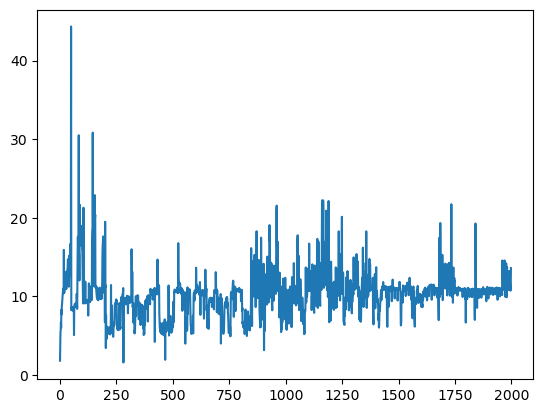

In [13]:
plot_array(tournoi_perfs / max_perfs)

en utilisant à nouveau $n_0 = 750$, et avec $c = 3$ par exemple, nous obtenons aussi que $\mbox{moyenne} = O{maximum}$. Comme dans le cas de deux nombre, lorsque $a \leq b$ et $b \leq a$, alors $a = b$. Ici, dans le cas de la complexité, nous dirons que nos deux algorithmes sont **dans la même classe de complexité**. Cette classe de complexité est la classe des algorithmes **linéaires**. Il s'agit de la classe de la fonction $f: n \mapsto n$. On peut le montrer facilement graphiquement :

In [14]:
lin = np.arange(1, 2000)
print(lin)

[   1    2    3 ... 1997 1998 1999]


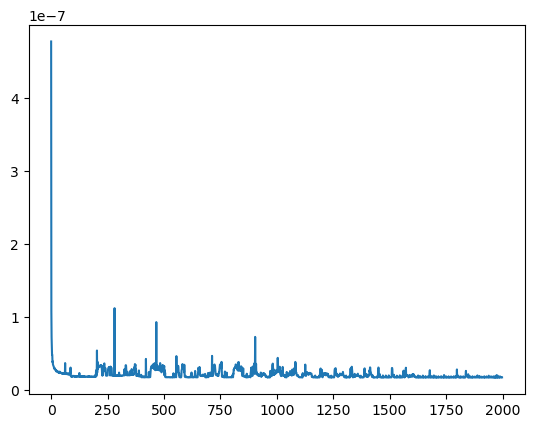

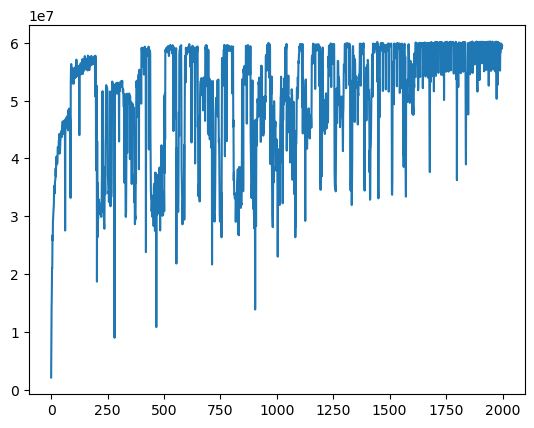

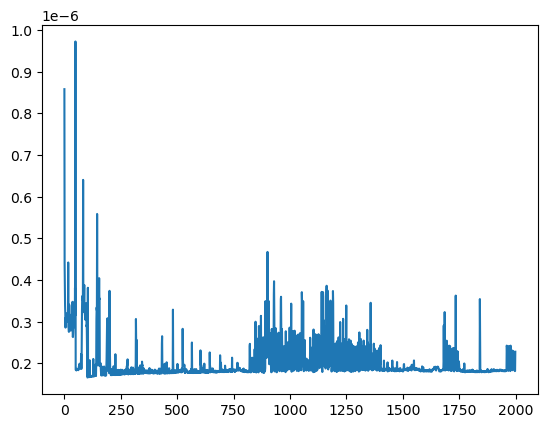

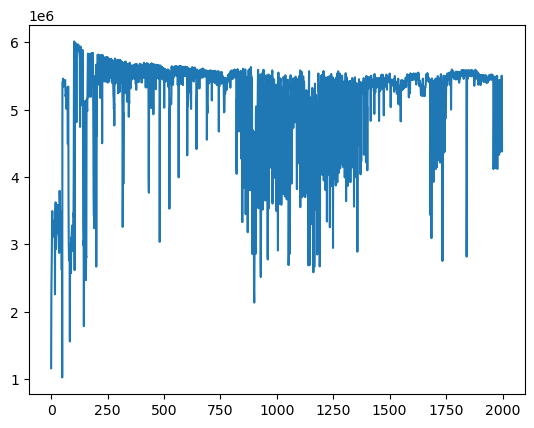

In [15]:
plot_array(max_perfs / lin)
plot_array(lin / max_perfs)
plot_array(tournoi_perfs / lin)
plot_array(lin / tournoi_perfs)

Chacune de ces courbes finit par être limitée sous une ligne horizontale.

## Autres notations liées

La relation $O$ suffit à comparer des fonctions entre elles, mais comme pour la relation $\leq$, pour laquelle il existe les notations associées $=$ et $\geq$, il existe en complexité les notations $\Theta$ (Thêta) et $\Omega$ (Oméga). La notation $\Theta$  définit les classes de complexité : si $f = \Theta(g)$ alors $f$ et $g$ sont dans la même classe de complexité. On peut se ramener à la notion de $O$ en disant que si $f = O(g)$ et $g = O(f)$ alors $f = \Theta(g)$ (et d'ailleurs $g = \Theta(f)$). $\Omega$ correspond à la notion de "plus grand que" : si $f = O(g)$ alors $g = \Omega(f)$. Prenons par exemple le cas du tri à bulles :

In [16]:
def bulle(tab_in):
    tab = tab_in[:]
    for i in range(len(tab) - 1):
        for j in range(len(tab) - i - 1):
            if tab[j] > tab[j+1]:
                tmp = tab[j]
                tab[j] = tab[j+1]
                tab[j+1] = tmp
    return tab

In [17]:
print(t)
print(bulle(t))

[46, 65, 72, 66, 32, 83, 78, 91, 93, 23, 50, 85, 73, 14, 60, 12, 84, 27, 28, 64]
[12, 14, 23, 27, 28, 32, 46, 50, 60, 64, 65, 66, 72, 73, 78, 83, 84, 85, 91, 93]


In [18]:
bulle_perfs = perf(bulle, max_input[::100])

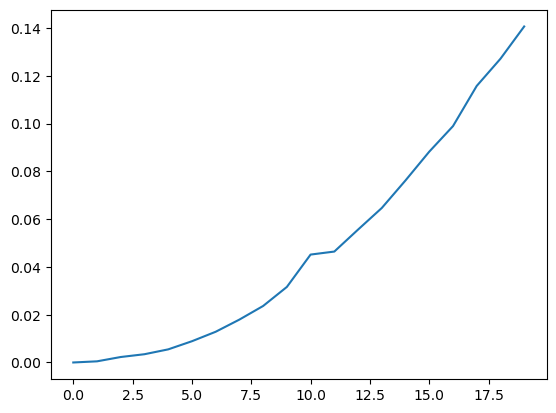

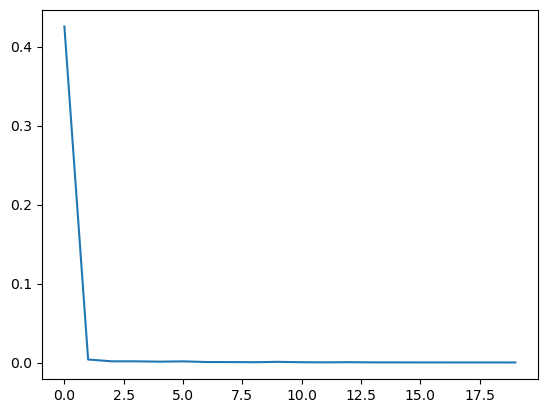

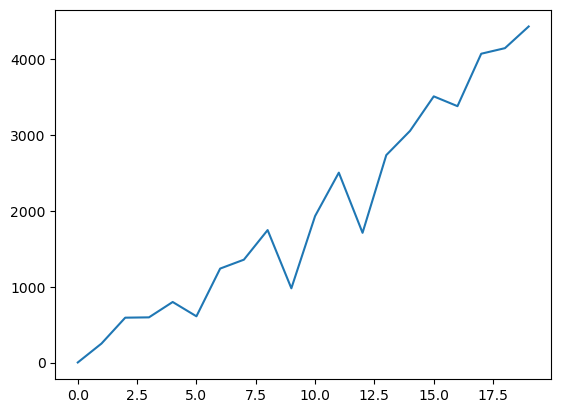

In [19]:
plot_array(bulle_perfs)
plot_array(max_perfs[::100] / bulle_perfs)
plot_array(bulle_perfs / max_perfs[::100])

Ici, la seconde courbe nous montre que $\mbox{maximum} = O(\mbox{bulle})$, par contre la troisième courbe montre que nous n'avons pas $\mbox{bulle} = O(\mbox{maximum})$. Nous savons ainsi que maximum et bulle ne sont pas dans la même classe de complexité, que maximum est "plus petit que" bulle : $\mbox{maximum} = O(\mbox{bulle})$ et que bulle est "plus grand que" maximum : $\mbox{bulle} = \Omega(\mbox{maximum})$. Le tri à bulle est un algorithme **quadratique** c'est à dire qu'il est dans la classe de complexité de la fonction $f : n \mapsto n^2$ :

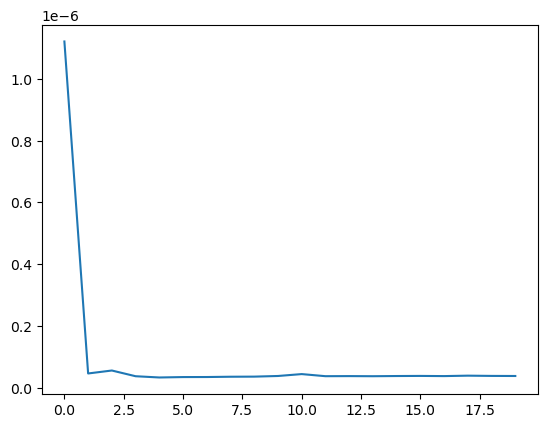

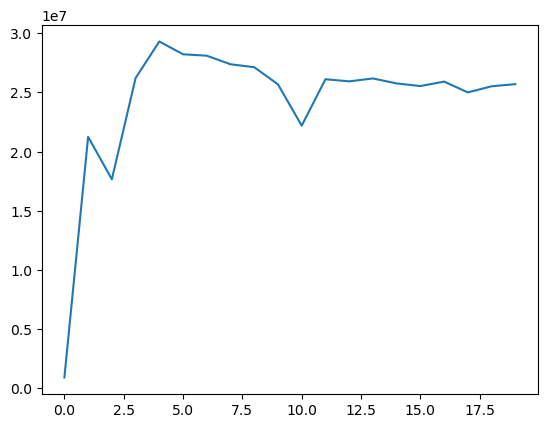

In [20]:
quad = lin * lin
plot_array(bulle_perfs / quad[::100])
plot_array(quad[::100] / bulle_perfs)

En terme de définition, on peut écrire

$$
    f = \Omega(g) \Leftrightarrow
    \exists n_0 \geq 0,
    \exists c > 0,
    \forall n \geq n_0,
    f(n) \geq c \times g(n)
$$

et

$$
    f = \Theta(g) \Leftrightarrow
    \exists n_0 \geq 0,
    \exists c_1 > 0,
    \exists c_2 > 0,
    \forall n \geq n_0,
    c_1 \times g(n) \leq f(n) \leq c_2 \times g(n)
$$

Avec ces outils, nous pouvons également étudier de manière empirique une fonction dont nous n'avons pas l'algorithme ou le code. Prenons par exemple l'algorithme de tri standard en python.

In [21]:
print(t)
print(sorted(t))

[46, 65, 72, 66, 32, 83, 78, 91, 93, 23, 50, 85, 73, 14, 60, 12, 84, 27, 28, 64]
[12, 14, 23, 27, 28, 32, 46, 50, 60, 64, 65, 66, 72, 73, 78, 83, 84, 85, 91, 93]


Nous pouvons empiriquement mesurer le temps d'exécution de l'algorithme sur une séquence de tableaux de tailles croissantes.

In [22]:
sorted_perf = perf(sorted, max_input)

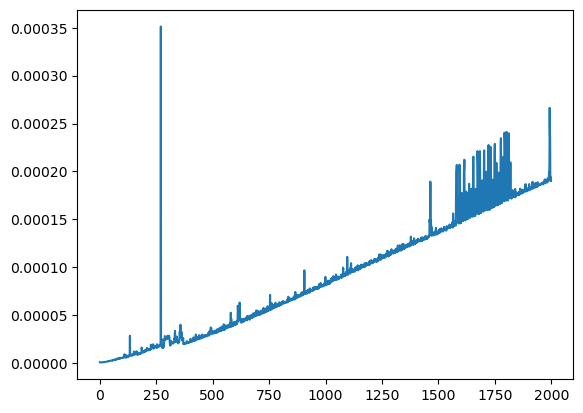

In [23]:
plot_array(sorted_perf)

À première vue la courbe ressemble à une droite, nous pouvons donc examiner si l'algorithme semble linéaire

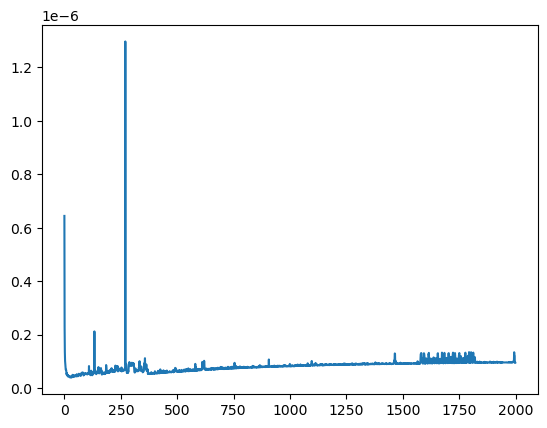

In [24]:
plot_array(sorted_perf / lin)

Ici il est un peu difficile de voir le comportement de la courbe car les valeurs du début écrasent un peu le tracé. Cependant, dans la définition de $O$, nous avons le droit de choisir un $n_0$ et d'ignorer tout ce qu'il se passe avant. Posons $n_0 = 500$ et traçons à nouveau.

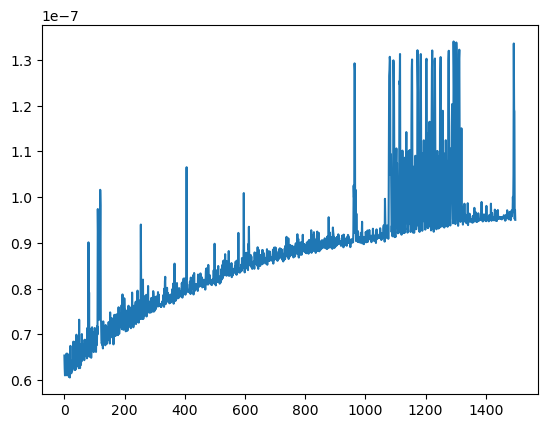

In [25]:
plot_array(sorted_perf[500:] / lin[500:])

On voit désormais que la tendance de la courbe ne semble pas s'aplatir pour devenir horizontale. Regardons désormais pour une borne quadratique.

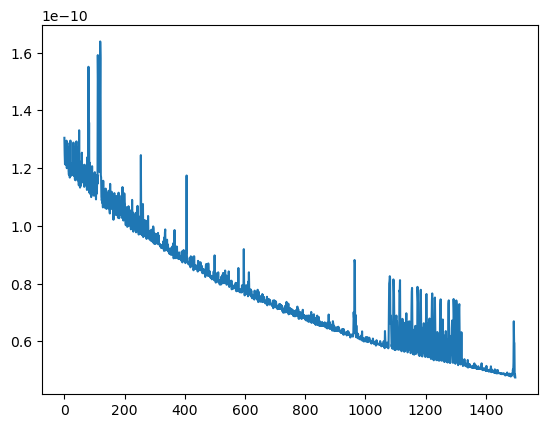

In [26]:
plot_array(sorted_perf[500:] / quad[500:])

Ici la courbe semble décroître vers 0. Nous semblons donc chercher quelques chose entre linéaire et quadratique. Une complexité classique pour les algorithmes de tri est la complexité $O(n\log(n)$. Cette complexité est optimale pour un tri à base de comparaisons. Essayons.

In [27]:
log = np.log(lin)

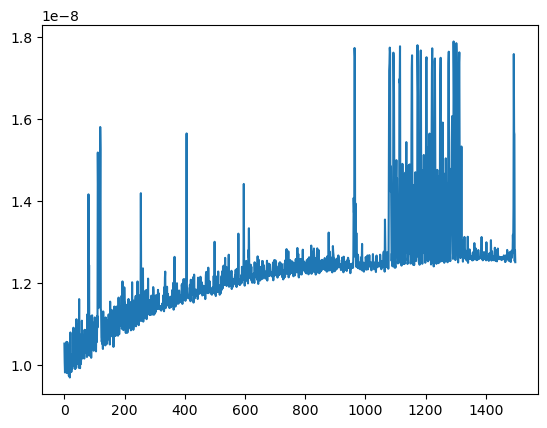

In [28]:
plot_array(sorted_perf[500:] / (lin[500:] * log[500:]))

Il semble cette fois que la courbe semble devenir horizontale et donc bornée par une constante. Il faudrait tester sur des tableaux plus grands pour confirmer la tendance.

## Opération sur les classes de complexité

Un algorithme est souvent composé d'autres algorithmes : ils sont parfois enchaînés l'un après l'autre, ou l'un appelle l'autre dans une boucle. Quelques opérations de base permettent de grandement se simplifier la vie.

Une première choses à noter est que lorsqu'on travaille avec des classes de complexité, on travaille à un facteur multiplicatif constant près. Ainsi si $a$ est une constante, et si $f$ est dans la classe de complexité de $g$, alors $a \times f$ est également dans la classe de complexité de $g$ :

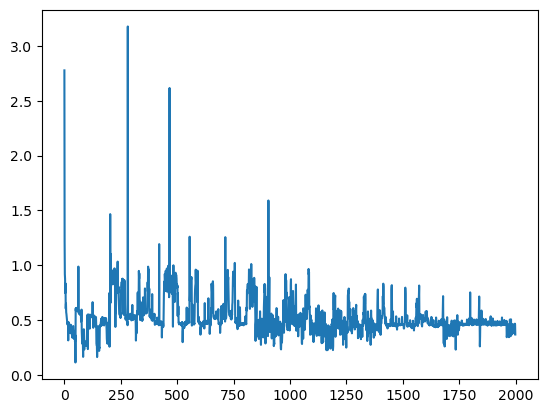

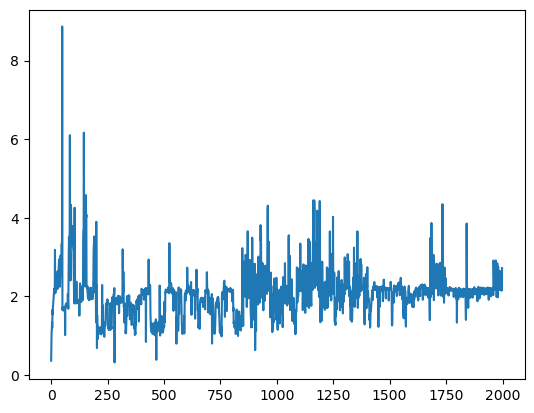

In [29]:
plot_array((5 * max_perfs) / tournoi_perfs)
plot_array(tournoi_perfs/ (5 * max_perfs))

Il n'y a donc pas d'intérêt à mentionner qu'une complexité est en $O(3n)$ car cette classe est la même que $O(n)$. D'un point de vue pratique, cette propritété fait qu'on n'a pas à se soucier d'une fait qu'une comparaison entre deux entiers sera deux fois plus rapide ou plus lente qu'une affectation d'un entier ou une incrémentation. La seule chose utile est de savoir qu'une incrémentation d'un entier est une opération réalisée en temps constant.

De même seule la classe de complexité la plus forte est importante dans une somme. Ainsi si $f_1 = \Theta(g_1)$ et $f_2 = \Theta(g_2)$ alors $f_1 + f_2 = \Theta(\max(g_1, g_2))$. Ainsi si on lance successivement un algorithme linéaire, puis un algorithme quadratique, l'algorithme résultant est quadratique.

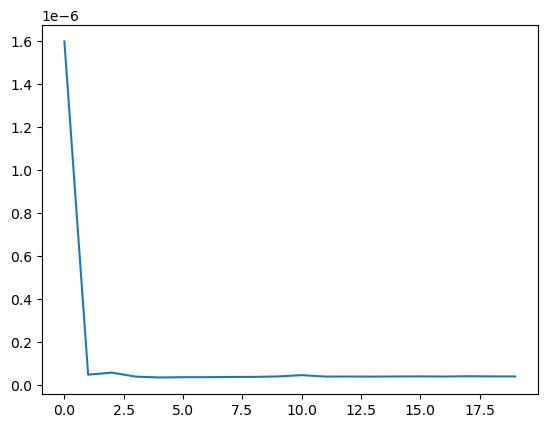

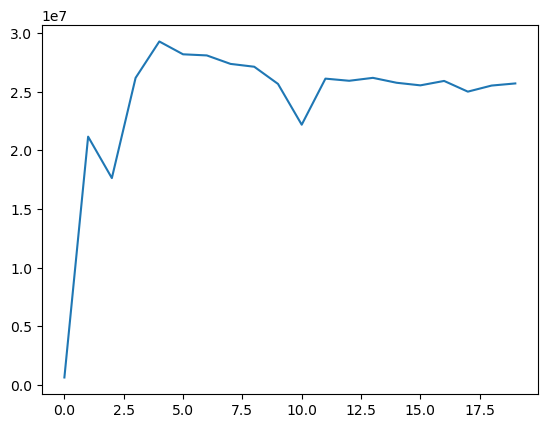

In [30]:
plot_array((max_perfs[::100] + bulle_perfs) / quad[::100])
plot_array(quad[::100] / (max_perfs[::100] + bulle_perfs))

## Étude dans le meilleur cas, le pire cas, en moyenne

Certains algorithmes n'ont pas toujours la même complexité selon les données qui leur sont fournies, **quelque soit la taille des données fournies**. Trouver le meilleur cas d'un algorithme consiste à trouver une configuration des données qui fasse en sorte que l'algorithme réalise le moins d'instructions possibles, ou occupe le moins de mémoire possible. **Il ne s'agit pas de travailler sur la taille des données**. Encore une fois, il est clair que si les données sont de taille faible, l'algorithme sera plus rapide. En complexité asymptotique, nous étudions les algorithmes lorsque la taille des données tend vers l'infini. Un meilleur cas doit donc pouvoir être réalisable **quelle que soit la taille des données**. Par exemple dans le cas du tri par insertion :

In [31]:
def insertion(tab_in):
    tab = tab_in[:]
    for i in range(1, len(tab)):
        tmp = tab[i]
        j = i - 1
        while(j >= 0 and tab[j] > tmp):
            tab[j+1] = tab[j]
            j -= 1
        tab[j+1] = tmp
    return tab

In [32]:
print(t)
print(insertion(t))

[46, 65, 72, 66, 32, 83, 78, 91, 93, 23, 50, 85, 73, 14, 60, 12, 84, 27, 28, 64]
[12, 14, 23, 27, 28, 32, 46, 50, 60, 64, 65, 66, 72, 73, 78, 83, 84, 85, 91, 93]


In [33]:
insertion_avg_perfs = perf(insertion, max_input[::100])

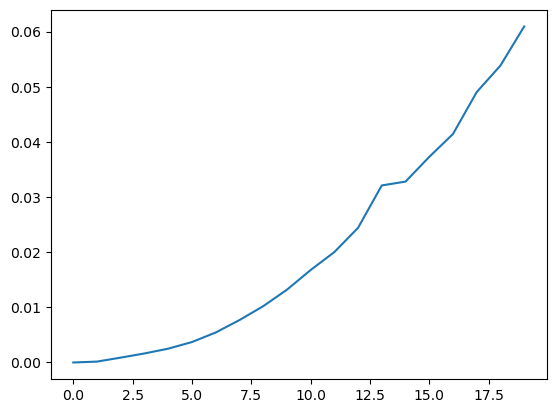

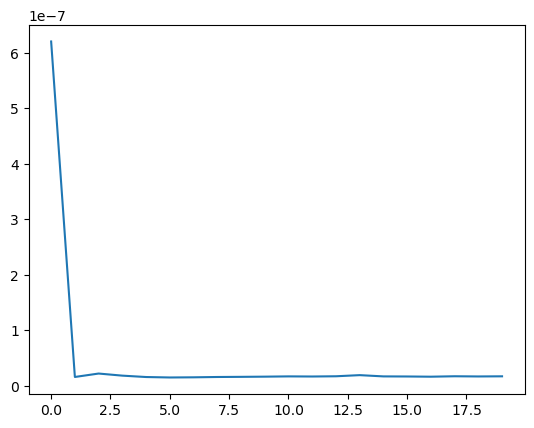

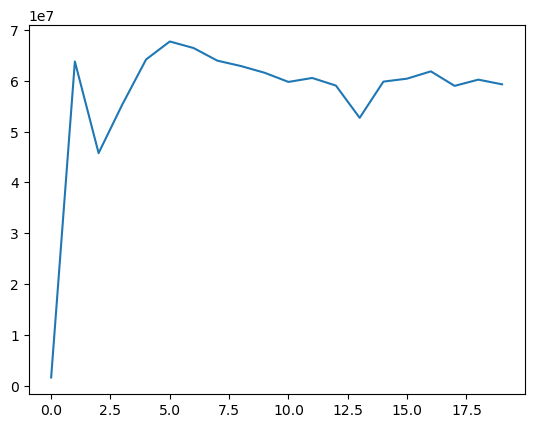

In [34]:
plot_array(insertion_avg_perfs)
plot_array(insertion_avg_perfs / quad[::100])
plot_array(quad[::100] / insertion_avg_perfs)

Ici la fonction `perf` mesure la **moyenne** du temps d'exécution de l'algorithme lancé dix fois **sur la même entrée**. D'après les courbes précédentes, il semble que l'algorithme soit dans la classe des algorithmes quadratiques. Il est néanmoins possible de trouver des données de taille aussi grande que voulu qui changent la complexité apparente de l'algorithme :

In [35]:
sorted_inputs = [list(range(i)) for i in range(1, 2000)]
print(sorted_inputs[20])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [36]:
insertion_sorted_perfs = perf(insertion, sorted_inputs)

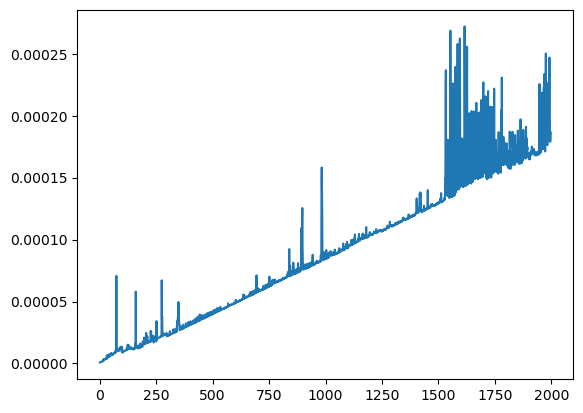

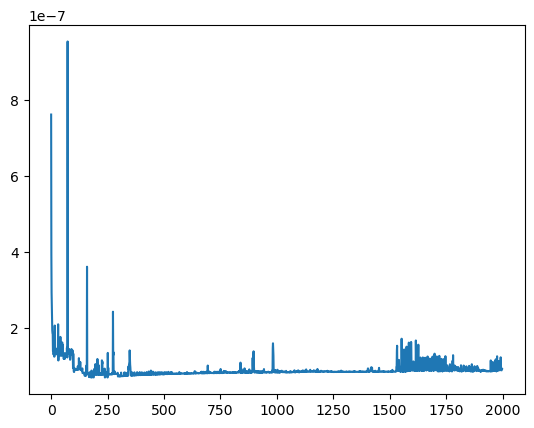

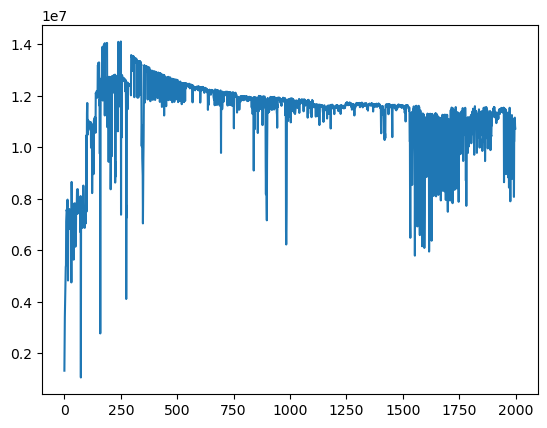

In [37]:
plot_array(insertion_sorted_perfs)
plot_array(insertion_sorted_perfs / lin)
plot_array(lin / insertion_sorted_perfs)

Ces graphes semblent désormais classer le tri par insertion dans la classe des algorithmes linéaires. On voit donc que **selon la famille d'entrées choisies, la classe de complexité n'est pas la même**. En revenant sur le tri par insertion, on voit que par rapport au tri à bulle, la boucle interne est une boucle "tant que". Une boucle "tant que" s'arrête dès que sa condition est remplie. Ici nous voyons que dans le pire des cas, `j` diminue petit avec un pas de 1, et que la boucle s'arrête quand `j` devient négatif. Dans le meilleur des cas, la boucle s'arrête immédiatement sur le cas `tab[j] > tmp`. Dans la seconde famille d'entrées testées pour notre algorithme, les tableaux fournis sont **déjà triés**, ce qui provoque systématiquement l'arrêt immédiat de la boucle "tant que", et donc le meilleur cas. Quelle que soit sa taille, un tableau peut être déjà trié. Nous avons donc bien un meilleur cas qui fonctionne **quelle que soit la taille des données**.

Sur cette base, on voit qu'il est possible d'étudier un algorithme de plusieurs façons :

* l'analyse du meilleur cas cherche à trouver **une famille d'entrées** qui donne la meilleure complexité possible
* l'analyse du pire cas cherche à trouver **une famille d'entrées** qui donne la pire complexité possible
* l'analyse moyenne cherche à énoncer la **moyenne sur toutes les entrées possibles** pour toute taille de l'algorithme

Dans le cas du tri par insertion, le meilleur cas est réalisé pour un tableau déjà trié. La boucle "tant que" sort immédiatement. Le pire cas est réalisé pour un tableau trié dans l'ordre inverse, et cette fois la boucle "tant que" réalisera systématiquement toutes les itérations jusqu'à ce que la condition `j >= 0` ne soit plus remplie. Enfin l'étude en moyenne réalise la moyenne de la complexité sur toutes les permutations possible d'un tableau de taille $n$. Il est ainsi possible de montrer que dans ce cas, la boucle "tant que" réalisera en moyenne $\frac{i}{2}$ itérations, et que la complexité finale sera quadratique (d'où le comportement quadratique constaté sur une famille d'entrées quelconques).